   年龄(岁)  收入(万元)
0     50      66
1     44      51
2     30      56
3     46      50
4     32      50


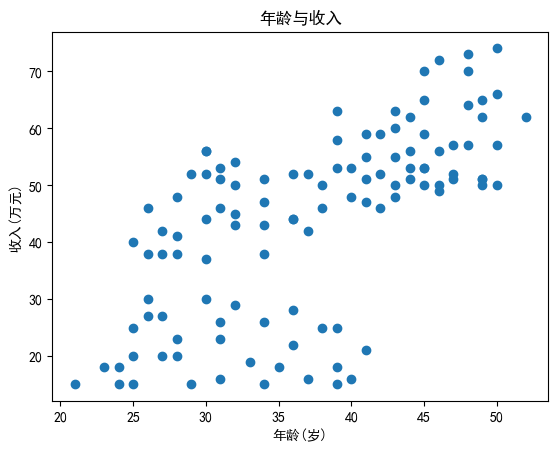

In [1]:
# 题目三 、银行客户分群。
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
# 利用客户信息.xlsx数据集，选择合适模型，解决银行客户分群问题。
# 1、读取数据并查看前5行。（1分）
import pandas as pd
import  numpy as np
a1=pd.read_excel('E:\\python代码\\lx-yk\\data-yk\\yk6\\客户信息.xlsx')
print(a1.head(5))

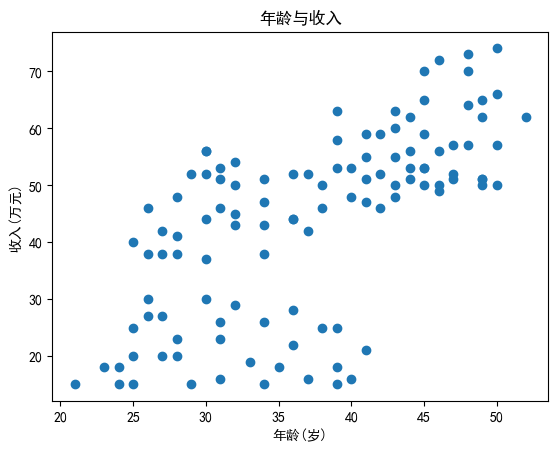

In [2]:
# 2、EDA分析：可视化展示并形成分析结论（3分）
# 可视化展示
plt.scatter(a1['年龄(岁)'],a1['收入(万元)'])
plt.xlabel('年龄(岁)')
plt.ylabel('收入(万元)')
plt.title('年龄与收入')
plt.show()
#分析结论
#岁数越大工资越高

In [6]:
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score
# 3、数据建模：选择合适的模型建模训练，并选用合适的指标评估模型。（6分）
from sklearn.cluster import KMeans
# 选择合适的模型   # 训练建模
kmeans = KMeans(n_clusters=2, random_state=0).fit(a1)

bq=kmeans.labels_

shsa = silhouette_samples(a1, bq)
shsc = silhouette_score(a1, bq)
chs = calinski_harabasz_score(a1, bq)
print(f"轮廓系数:{shsa}\n 平均轮廓系数:{shsc}\n 方差比率:{chs}\n")


轮廓系数:[0.6420704  0.6839795  0.55722576 0.65400388 0.51909627 0.4694817
 0.66072445 0.02084344 0.51784168 0.66335288 0.72340724 0.63918226
 0.69691644 0.58668622 0.67244042 0.69923014 0.71463571 0.55722576
 0.72407697 0.70998369 0.6777201  0.37020355 0.58657494 0.64332726
 0.70581891 0.63071922 0.70685266 0.655669   0.55291104 0.62117071
 0.25471794 0.69142336 0.37020355 0.34343266 0.60165381 0.72722848
 0.6402387  0.71418273 0.30658958 0.67170871 0.71827763 0.63918226
 0.26316938 0.70328194 0.32098772 0.67100797 0.48455213 0.61424826
 0.67341389 0.07304274 0.54211269 0.66500167 0.70581891 0.51195171
 0.71583163 0.70022569 0.6751125  0.71816319 0.30067768 0.71398514
 0.63338722 0.13561339 0.19206018 0.50513921 0.64008563 0.61129145
 0.58715917 0.64659408 0.69967688 0.71938059 0.68505855 0.71519693
 0.68425056 0.66201117 0.59055631 0.66292246 0.68839492 0.70731062
 0.68408657 0.58940167 0.61821028 0.69540834 0.62924296 0.70806011
 0.72315309 0.71985504 0.67857282 0.60691545 0.65708194 0.

D:\Jupyter\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


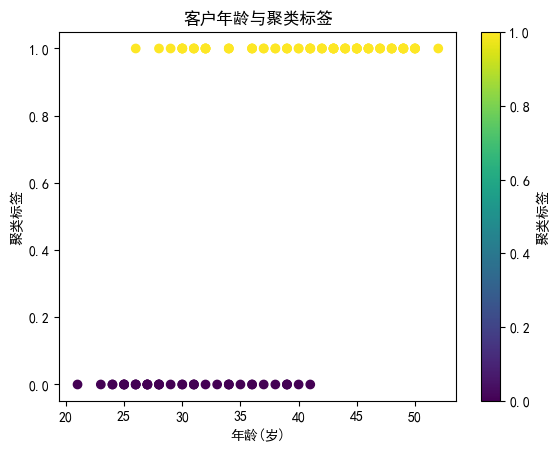

In [12]:
# 4、建模效果可视化展示（4分）

plt.scatter(a1['年龄(岁)'],bq, c=bq)
plt.title('客户年龄与聚类标签')  
plt.xlabel('年龄(岁)')  
plt.ylabel('聚类标签')  
# plt.colorbar(label='聚类标签')  # 添加颜色条以解释颜色映射  
plt.show()

In [15]:
# 5、各标签人的收入均值（4分）
a1['标签']=list(bq)
#根据标签列分组，并且根据收入(万元)求每组的平均
a1.groupby('标签')['收入(万元)'].mean()


标签
0    24.700000
1    54.138889
Name: 收入(万元), dtype: float64